# Boys and Girls

## aka, Wall & Jenkins 2.9

In [1]:
# imports
import numpy as np

import seaborn
from matplotlib import pyplot as plt
import pandas

from astr234 import plotting

# Problem 

### Imagine a society where boys and girls were biologically equally likely to be born, but families cease producing children after the birth of the first girl. Are there more males or females in the population? 

### Simulate using Monte Carlo

# Init

In [2]:
nmothers = 100000

# Random number for first child

In [3]:
random_first = np.random.randint(2, size=nmothers)

In [4]:
boys_first = random_first == 0
girls_first = np.logical_not(boys_first)

## Count the first go

In [5]:
nboys_1 = np.sum(boys_first)
ngirls_1 = np.sum(girls_first)
#
print(f'We have {nboys_1} boys and {ngirls_1} girls for first borns.')

We have 50160 boys and 49840 girls for first borns.


# Total and cumulative

In [6]:
total_boys = nboys_1
total_girls = ngirls_1

In [7]:
cum_boys, cum_girls = [], []
cum_boys.append(nboys_1)
cum_girls.append(ngirls_1)

## Do the rest

### Note: we could have used the following method for all the generations, but wanted to examine the first born for pedagogy

In [8]:
still_birthing = nboys_1

In [9]:
ngen = 2
while still_birthing > 0:
    # Random numbers
    boygirl = np.random.randint(2, size=still_birthing)
    # The mothers with a girl stop trying
    girl = boygirl == 1
    total_girls += np.sum(girl)
    # Boys
    new_boys = np.sum(np.logical_not(girl))
    total_boys += new_boys
    still_birthing = new_boys
    # The others had another boy!
    print(f'Generation: {ngen} -- There are {np.sum(still_birthing)} mothers still trying!')
    ngen += 1
    # Cumulative
    cum_boys.append(total_boys)
    cum_girls.append(total_girls)
    # Debuggin
    #if ngen > 100000:
    #    break

Generation: 2 -- There are 25159 mothers still trying!
Generation: 3 -- There are 12594 mothers still trying!
Generation: 4 -- There are 6245 mothers still trying!
Generation: 5 -- There are 3116 mothers still trying!
Generation: 6 -- There are 1561 mothers still trying!
Generation: 7 -- There are 804 mothers still trying!
Generation: 8 -- There are 421 mothers still trying!
Generation: 9 -- There are 208 mothers still trying!
Generation: 10 -- There are 99 mothers still trying!
Generation: 11 -- There are 44 mothers still trying!
Generation: 12 -- There are 20 mothers still trying!
Generation: 13 -- There are 12 mothers still trying!
Generation: 14 -- There are 6 mothers still trying!
Generation: 15 -- There are 2 mothers still trying!
Generation: 16 -- There are 1 mothers still trying!
Generation: 17 -- There are 1 mothers still trying!
Generation: 18 -- There are 0 mothers still trying!


# Finish

In [10]:
assert total_girls == nmothers

In [11]:
print(f'The {nmothers} mothers gave birth to {total_boys} boys and {total_girls} girls.')

The 100000 mothers gave birth to 100453 boys and 100000 girls.


## Plot

In [12]:
gens = np.arange(ngen-1)+1

In [13]:
len(gens), len(cum_boys)

(18, 18)

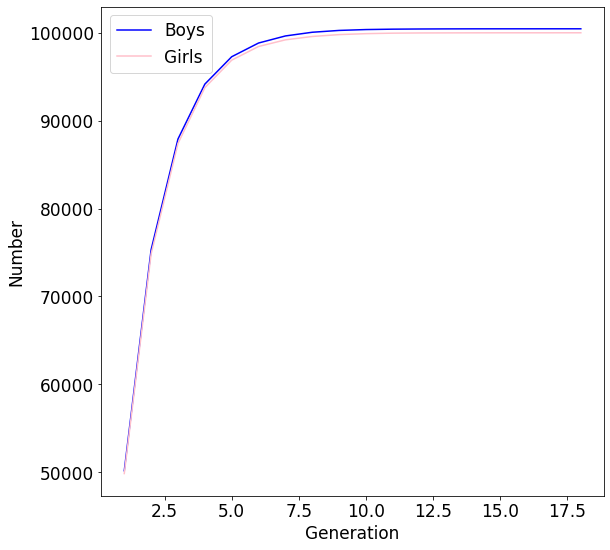

In [15]:
plt.figure(figsize=(9,9))
plt.clf()
#
ax = plt.gca()

ax.plot(gens, cum_boys, color='blue', label='Boys')
ax.plot(gens, cum_girls, color='pink', label='Girls')
#
ax.legend(fontsize=17.)
ax.set_xlabel('Generation')
ax.set_ylabel('Number')
# make pretty
plotting.set_fontsize(ax, 17.)
#
plt.savefig('boys_girls.png', dpi=200)
plt.show()
